In [4]:
"""Inverse transform sampling, reference from Deep Learning by Bishop & Bishop, chapter 14."""

'Inverse transform sampling, reference from Deep Learning by Bishop & Bishop, chapter 14.'

In [8]:
import numpy as np
import matplotlib.pyplot as plt

The motivation is that we often want to generate numbers from nonuniform distributions. This seemingly trivial task actually has some interesting math behind it, especially in the case of drawing from Gaussian distributions. 

This notebook goes over the math, and implements some of the sampling algorithms from scratch, and maybe the Gaussian one if I'm really ambitious. 

### The mathematics of it all... 

So say we have a random uniform number generator from 0 to 1, something that looks like this: 

In [10]:
# generate 100k of those bois
random_numbers = np.random.rand(100000)

We can look at the histogram of those 100k numbers to see that they are uniformly distributed, and it looks uniform enough. 

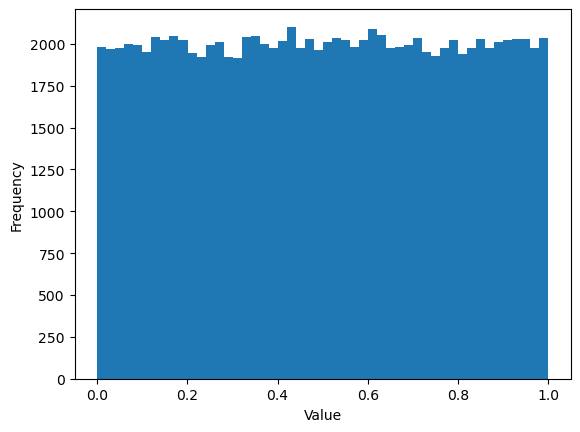

In [12]:
plt.hist(random_numbers, bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Now, if we have that, how do we generate samples such that they are distributed according to another distribution?

We have $z \sim U[0,1]$, we want a function $g(\cdot)$ such that $y = g(z)$, and $p(y)$ has our desired distribution. 

With the change of variables formula in probability distributions, we get that if $y = g(z), then:$

$$p(y) = p(z) |\frac{dz}{dy}|$$

Since $z$ is distributed uniformly, $p(z) = 1$. We can then integrate on both sides and do some math:

$$p(y) dy = dz $$
$$\int p(y) dy = \int dz$$
$$z = \int p(y) dy$$
$$z = F(y) = \int^y_{-\infty} p(y') dy$$

### Example o'clock

Say that we would like our samples to be distributed according to the exponential distribution:

$$p(y) = \lambda e^{-\lambda y}$$

Which looks something like:

/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/T/ipykernel_50526/3108241770.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


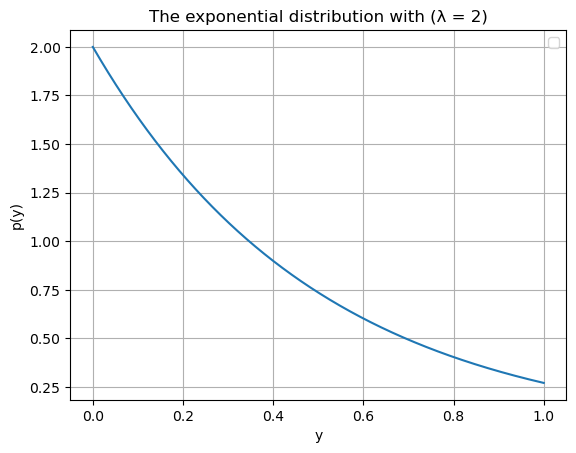

In [15]:
lmda = 2
y = np.linspace(0, 1, 10000)
p_y = lmda * np.exp(-lmda * y)
plt.plot(y, p_y)
plt.xlabel("y")
plt.ylabel("p(y)")
plt.title(f"The exponential distribution with (λ = {lmda})")
plt.legend() 
plt.grid()
plt.show()

$$p(y) = \lambda e^{-\lambda y}$$
$$\int p(y) dy = \int^y_0 \lambda e^{-\lambda y} dy$$ 
$$= [-e^{\lambda y}]^y_0 = -e^{\lambda y} + 1 = 1 - e^{-\lambda y}$$

So:

$$z = \int p(y) dy = 1 - e^{\lambda y}$$
$$1 - z = e^{-\lambda y}$$
$$-\lambda y = ln(1-z)$$
$$y = - \frac{1}{\lambda} ln(1-z)$$

### Let's see some points...

In [17]:
exp_y = - (1 / lmda) * np.log(1 - random_numbers)

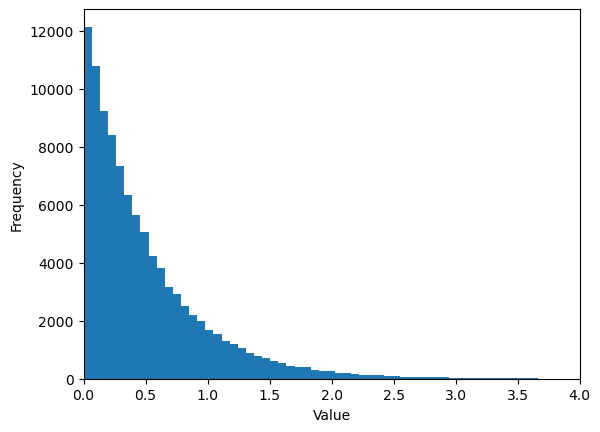

In [20]:
plt.hist(exp_y, bins=100)
plt.xlabel("Value")
plt.xlim(0, 4)
plt.ylabel("Frequency")
plt.show()